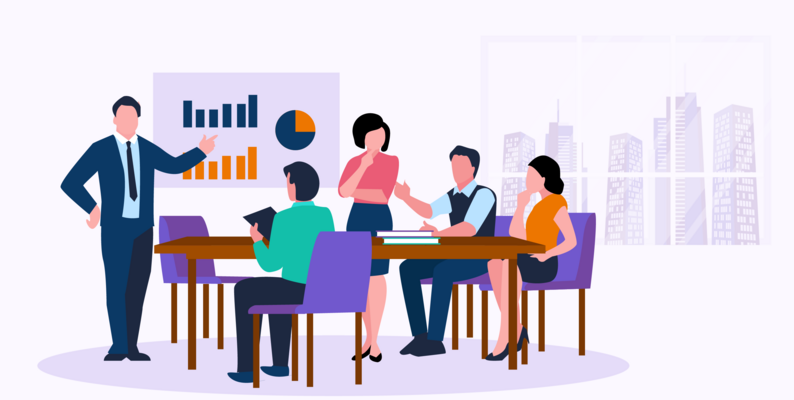

Import the necessary libraries

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

Loading the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pushkarsaini18/Customer-Behaviour-Pattern/main/dataset/marketing_campaign.csv')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Data Cleaning

Identifying Null values

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 entries in Income column with null values.

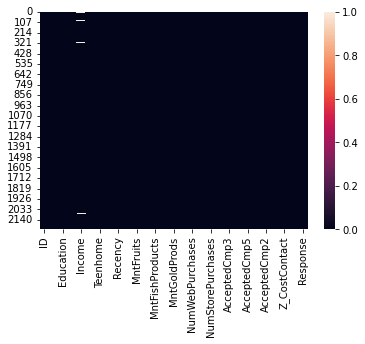

In [7]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())

In [8]:
df.corr()['Response']

ID                    -0.021968
Year_Birth             0.021325
Income                 0.133047
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
MntWines               0.247254
MntFruits              0.125289
MntMeatProducts        0.236335
MntFishProducts        0.111331
MntSweetProducts       0.117372
MntGoldProds           0.139850
NumDealsPurchases      0.002238
NumWebPurchases        0.148730
NumCatalogPurchases    0.220810
NumStorePurchases      0.039363
NumWebVisitsMonth     -0.003987
AcceptedCmp3           0.254258
AcceptedCmp4           0.177019
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp2           0.169293
Complain              -0.001707
Z_CostContact               NaN
Z_Revenue                   NaN
Response               1.000000
Name: Response, dtype: float64

In [9]:
df['Income'].corr(df['Response'])

0.13304666375157914

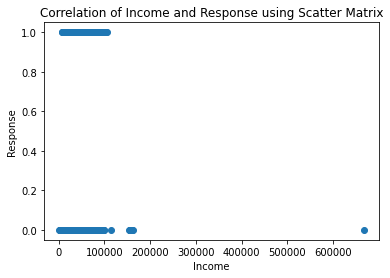

In [10]:
plt.scatter(df['Income'], df['Response'])
plt.ylabel("Response")
plt.xlabel("Income")
plt.title("Correlation of Income and Response using Scatter Matrix")
plt.show()

The correlation coefficient of Income with Response is 0.133 . So instead of dropping the whole column, we will remove the rows with null values of Income.

In [11]:
df = df.dropna() #only Income has null values
df.shape

(2216, 29)

Now the dataframe has 2216 with all non-null values.

In [12]:
# Finding the number of unique values present in each column

df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

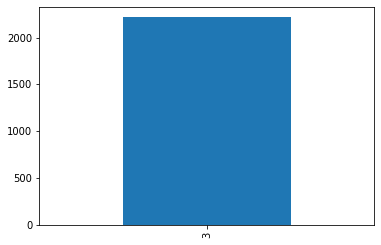

In [13]:
df.Z_CostContact.value_counts().plot(kind = 'bar')


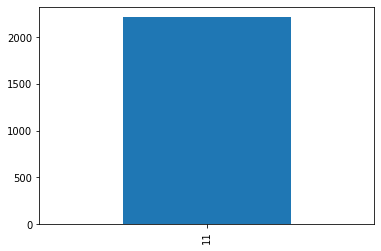

In [14]:
df.Z_Revenue.value_counts().plot(kind = 'bar')

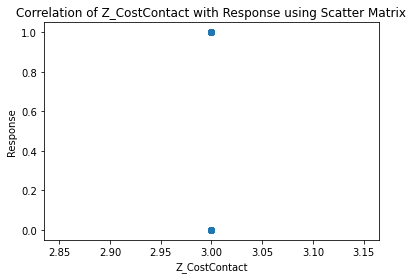

In [15]:
plt.scatter(df['Z_CostContact'], df['Response'])
plt.ylabel("Response")
plt.xlabel("Z_CostContact")
plt.title("Correlation of Z_CostContact with Response using Scatter Matrix")
plt.show()

In [16]:
df['Z_CostContact'].corr(df['Response'])

nan

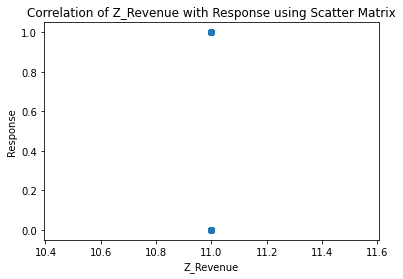

In [17]:
plt.scatter(df['Z_Revenue'], df['Response'])
plt.ylabel("Response")
plt.xlabel("Z_Revenue")
plt.title("Correlation of Z_Revenue with Response using Scatter Matrix")
plt.show()

In [18]:
df['Z_Revenue'].corr(df['Response'])

nan

Z_CostContact and Z_revenue, it will be better to drop the whole column.

In [19]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
print("The updated size of dataset", df.shape)
df.head()


The updated size of dataset (2216, 27)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [20]:
from pandas.plotting import scatter_matrix
#scatter_matrix(df)

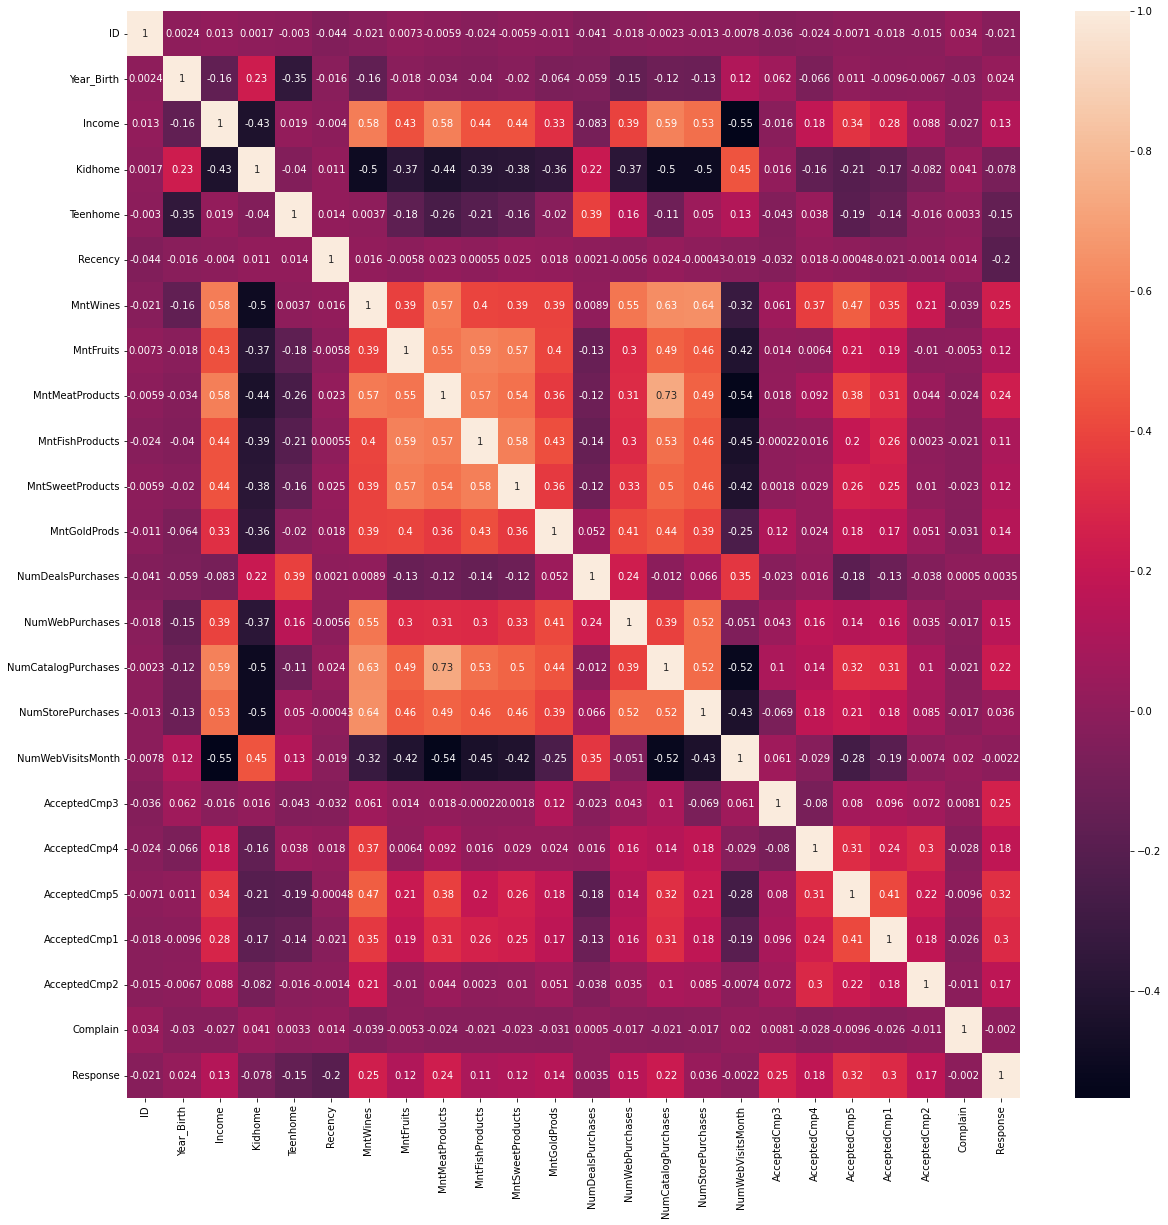

In [21]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Data Preprocessing

Dt_Customer is an object type column that denotes **Date of customer’s enrollment with the company** . So we need to update it to datetime format

In [22]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]) #date of enrollment with the company
dates = [] #list of days the customer has been with the company
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


We are creating a new feature that denotes this duration of time the customer is with the company using "Customer For"

In [23]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [24]:
# Checking number of unique categories present in the "Marital_Status"

df['Marital_Status'].value_counts()  

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [25]:
#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

"Year_Birth" column is not directly related with our target. We can derive a new variable "Age" from it

In [26]:
# Adding a column "Age" in the dataframe

df['Age'] = 2022 - df["Year_Birth"]

Segmenting education levels in three groups for simplicity

In [27]:
df["Education"]=df["Education"].replace(
    {"Basic":"Undergraduate",
     "2n Cycle":"Undergraduate", 
     "Graduation":"Graduate", 
     "Master":"Postgraduate", 
     "PhD":"Postgraduate"})

In [28]:
df['Education'].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

Adding a new feature "Spent" to get the total expenditure of each customer 

In [29]:
#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

Adding a new feature "Children" to count the total children of a customer

In [30]:
#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

Adding a new feature "Family_Size" to count the total members in customer's family

In [31]:
#Feature for total members in the household
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

Feature pertaining parenthood

In [32]:

df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

For clarity replacing "amount of foods" with simply their names

In [33]:

df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

As we have already extracted key information from "Marital Status",  "Dt_Customer" and "Year_Birth"  using "Living_With" , "Customer_For" and "Age" . We are dropping those columns

In [34]:

to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth"]
df = df.drop(to_drop, axis=1)
df.shape

(2216, 31)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   Wines                2216 non-null   int64  
 7   Fruits               2216 non-null   int64  
 8   Meat                 2216 non-null   int64  
 9   Fish                 2216 non-null   int64  
 10  Sweets               2216 non-null   int64  
 11  Gold                 2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

In [36]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,53.179603,607.075361,0.947202,2.592509,0.714350
std,3249.376275,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,5.000000,0.000000,1.000000,0.000000
25%,2814.750000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,45.000000,69.000000,0.000000,2.000000,0.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,52.000000,396.500000,1.000000,3.000000,1.000000
75%,8421.750000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,63.000000,1048.000000,1.000000,3.000000,1.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,129.000000,2525.000000,3.000000,5.000000,1.000000


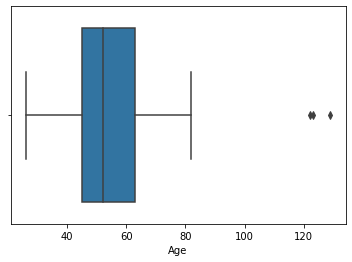

In [37]:
ax = sns.boxplot(x=df["Age"])

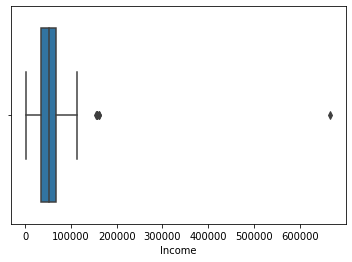

In [38]:
ax = sns.boxplot(x=df["Income"])

So there are few outliers in Age & Income columns. We are dropping them.

In [39]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
df.shape

(2212, 31)

### Handling Categorical Variables

Undergraduate, Graduate and Postgraduate can be denoted as three consecutive levels, so we added LabelEncoder for the "Education" Column.

In [40]:
le = LabelEncoder()
df["Education"] = le.fit_transform(df["Education"])

In [44]:
df.sample(20)

,ID,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Living_With,Age,Spent,Children,Family_Size,Is_Parent
1285,5267,0,33986.0,1,0,43,16,2,18,2,1,5,1,1,0,3,7,0,0,0,0,0,0,0,54604800000000000,Alone,52,44,1,2,1
812,9687,0,73170.0,0,0,1,184,174,256,50,30,32,1,5,4,6,2,0,0,0,0,0,0,0,16329600000000000,Alone,47,726,0,1,0
1759,5883,0,77981.0,1,0,78,138,120,204,16,126,60,3,7,4,7,5,0,0,0,0,0,0,0,48297600000000000,Partner,50,664,1,3,1
150,3830,1,59354.0,0,2,59,295,21,78,39,13,13,1,4,4,7,3,0,0,0,0,0,0,0,19526400000000000,Partner,69,459,2,4,1
2014,3262,0,68281.0,0,0,31,995,112,417,42,48,41,1,2,9,13,5,0,0,0,0,0,0,1,76118400000000000,Alone,64,1655,0,1,0
755,3870,2,63855.0,0,0,28,359,35,314,93,116,89,1,7,3,13,4,0,0,0,0,0,0,0,39744000000000000,Partner,44,1006,0,2,0
1022,6059,1,64504.0,1,2,81,986,36,168,16,0,108,7,11,3,4,7,0,0,0,0,0,0,1,52876800000000000,Partner,69,1314,3,5,1
25,7892,0,18589.0,0,0,89,6,4,25,15,12,13,2,2,1,3,7,0,0,0,0,0,0,0,58147200000000000,Alone,53,75,0,1,0
442,5029,0,18100.0,0,0,14,3,1,2,4,3,1,1,0,0,3,5,0,0,0,0,0,0,0,47174400000000000,Partner,76,14,0,2,0
1600,5272,1,53843.0,0,1,64,378,0,88,19,4,73,4,8,5,3,7,0,0,0,0,0,0,0,45532800000000000,Partner,57,562,1,3,1


We are using One hot encoding for "Living_With" and dropping the first column from the generated dummy column because we can easily differentiate that using the remaining column

In [45]:


tempdf = pd.get_dummies(df["Living_With"], prefix="Living_With", drop_first=True)
df = pd.merge(
    left=df,
    right=tempdf,
    left_index=True,
    right_index=True,
)
df = df.drop(columns="Living_With")
display(df)

,ID,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With_Partner
0,5524,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,65,1617,0,1,0,0
1,2174,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,68,27,2,3,1,0
2,4141,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,57,776,0,2,0,1
3,6182,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,38,53,1,3,1,1
4,5324,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,41,422,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,0,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,46742400000000000,55,1341,1,3,1,1
2236,4001,1,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,5270400000000000,76,444,3,5,1,1
2237,7270,0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,27216000000000000,41,1241,0,1,0,0
2238,8235,1,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,27302400000000000,66,843,1,3,1,1


In [46]:
df.sample(10)

,ID,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With_Partner
2031,3799,0,67225.0,0,1,4,315,35,322,46,7,143,3,7,2,11,5,0,0,0,0,0,0,0,32400000000000000,67,868,1,3,1,1
1457,2157,0,26290.0,1,1,49,15,8,16,11,5,22,4,2,0,4,6,0,0,0,0,0,0,0,31968000000000000,50,77,2,4,1,1
1993,10164,0,94472.0,0,1,75,1017,33,417,108,100,16,1,5,5,5,5,0,1,1,0,0,0,0,23932800000000000,64,1691,1,2,1,0
1416,524,2,22634.0,0,0,47,2,23,11,8,6,46,1,2,1,2,8,0,0,0,0,0,0,0,59529600000000000,56,96,0,2,0,1
772,8897,0,42720.0,1,1,9,392,5,91,28,26,112,8,7,3,7,8,0,0,0,0,0,0,1,51062400000000000,57,654,2,3,1,0
181,3559,2,16248.0,1,0,77,12,11,10,3,12,9,3,2,1,3,6,0,0,0,0,0,0,0,5356800000000000,34,57,1,3,1,1
704,968,1,41335.0,1,0,24,112,19,21,16,14,5,3,4,1,4,7,0,0,0,0,0,0,0,29808000000000000,54,187,1,2,1,0
888,8825,0,51195.0,1,1,46,230,14,156,82,24,58,8,9,2,5,8,0,0,0,0,0,0,0,60566400000000000,60,564,2,4,1,1
144,9701,0,41883.0,1,0,13,32,34,41,73,16,116,3,4,2,3,7,0,0,0,0,0,0,0,54172800000000000,34,312,1,3,1,1
343,6245,1,59292.0,0,1,71,378,14,68,19,14,14,2,3,5,8,3,0,0,0,0,0,0,0,46742400000000000,72,507,1,3,1,1


In [47]:
df['AcceptedCmp1'].value_counts()

0    2070
1     142
Name: AcceptedCmp1, dtype: int64

In [48]:
df['AcceptedCmp2'].value_counts()

0    2182
1      30
Name: AcceptedCmp2, dtype: int64

In [49]:
df['AcceptedCmp3'].value_counts()

0    2049
1     163
Name: AcceptedCmp3, dtype: int64

In [50]:
df['AcceptedCmp4'].value_counts()

0    2048
1     164
Name: AcceptedCmp4, dtype: int64

In [51]:
df['AcceptedCmp5'].value_counts()

0    2051
1     161
Name: AcceptedCmp5, dtype: int64

In [52]:
df['Complain'].value_counts()

0    2192
1      20
Name: Complain, dtype: int64

In [53]:
df['Response'].value_counts()

0    1879
1     333
Name: Response, dtype: int64

Here, we can see, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5,  Complain and Response are binary valued columns. 

In [54]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']


In [55]:
df['TotalAcceptedCmp'].value_counts()

0    1754
1     322
2      81
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64

In [56]:
df['ID'].value_counts()

5524     1
2072     1
7494     1
1763     1
7250     1
        ..
10548    1
7235     1
3560     1
5278     1
9405     1
Name: ID, Length: 2212, dtype: int64

In [57]:

to_drop = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "ID"]
df= df.drop(to_drop, axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [59]:
df["Is_Parent"].value_counts()

1    1580
0     632
Name: Is_Parent, dtype: int64

In [60]:
df['Complain'].value_counts()

0    2192
1      20
Name: Complain, dtype: int64

In [61]:
df['Response'].value_counts()

0    1879
1     333
Name: Response, dtype: int64

So, now we have 3 binary features, should we use them or not? Should we scale them or not? On this question, we have a Kaggle thread as [reference](https://www.kaggle.com/questions-and-answers/85079). Ultimately, we are using StandardScaler to scale them. 

### Data Scaling

In [62]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")

All features are now scaled


In [63]:
scaled_df.shape

(2212, 26)

In [64]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   float64
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   float64
 3   Teenhome             2212 non-null   float64
 4   Recency              2212 non-null   float64
 5   Wines                2212 non-null   float64
 6   Fruits               2212 non-null   float64
 7   Meat                 2212 non-null   float64
 8   Fish                 2212 non-null   float64
 9   Sweets               2212 non-null   float64
 10  Gold                 2212 non-null   float64
 11  NumDealsPurchases    2212 non-null   float64
 12  NumWebPurchases      2212 non-null   float64
 13  NumCatalogPurchases  2212 non-null   float64
 14  NumStorePurchases    2212 non-null   float64
 15  NumWebVisitsMonth    2212 non-null   f

In [65]:
scaled_df.to_csv("Scaled_Dataset.csv",index=False)

# Feature Reduction

In [66]:
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

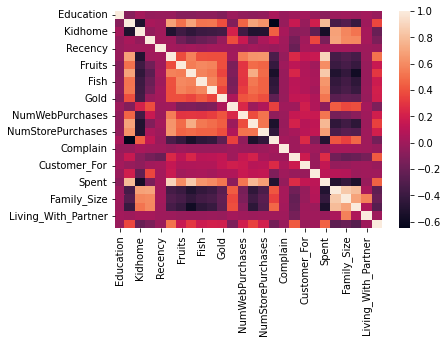

In [67]:

#Check the Co-relation between features without PCA
sns.heatmap(scaled_df.corr())

In [68]:
temp_df = scaled_df
temp_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With_Partner,TotalAcceptedCmp
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-0.09552,2.375425,1.973583,1.018352,1.676245,-1.264598,-1.758359,-1.581139,-1.349603,-0.43916
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-0.09552,-0.420977,-1.665144,1.274785,-0.963297,1.404572,0.449070,0.632456,-1.349603,-0.43916
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.09552,-0.420977,-0.172664,0.334530,0.280110,-1.264598,-0.654644,-1.581139,0.740959,-0.43916
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-0.09552,-0.420977,-1.923210,-1.289547,-0.920135,0.069987,0.449070,0.632456,0.740959,-0.43916
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.09552,-0.420977,-0.822130,-1.033114,-0.307562,0.069987,0.449070,0.632456,0.740959,-0.43916


### **Applying PCA taking no. of Principal Components as 3**

In [69]:
pca = PCA(n_components = 3)
pca.fit(temp_df)
df_pca_3 = pca.transform(temp_df)
df_pca_3 = pd.DataFrame(df_pca_3,columns=['PC1','PC2','PC3'])
df_pca_3.head()

,PC1,PC2,PC3
0,5.082850,-0.240890,2.681998
1,-2.946684,0.002002,-1.349815
2,2.468732,-0.718572,-0.807411
3,-2.738381,-1.532056,-0.749014
4,-0.748929,0.216956,-0.563133


Text(0.5, 0, 'PC3')

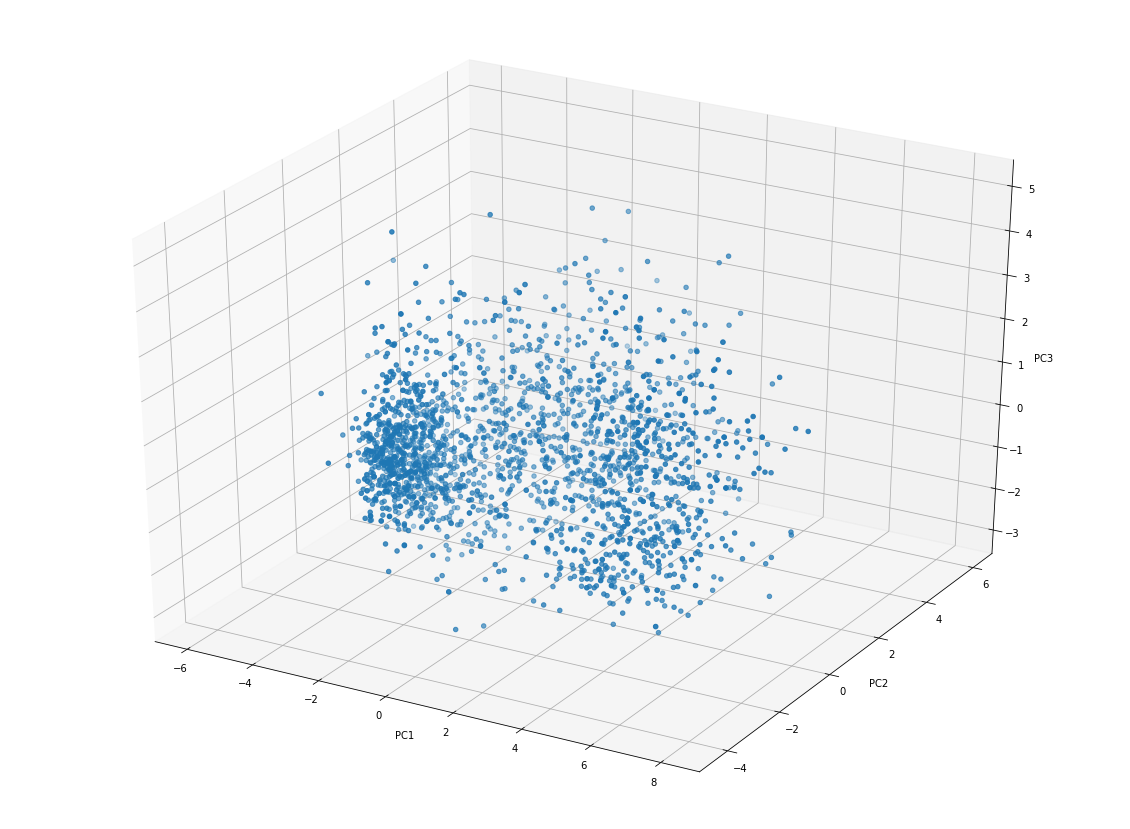

In [70]:
fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection = "3d")
ax.scatter3D(df_pca_3["PC1"],df_pca_3["PC2"],df_pca_3["PC3"])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

In [71]:
df_pca_3.to_csv("Scaled_PCA_n3.csv",index=False)

### **Applying PCA when we want the explained variance to be 95%**
ref: https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/


In [72]:
#95% of variance

pca = PCA(n_components = 0.95)
pca.fit(temp_df)
df_pca_95_var = pca.transform(temp_df)
df_pca_95_var = pd.DataFrame(df_pca_95_var,columns=['PC'+str(i) for i in range(1,len(df_pca_95_var[0])+1)])
df_pca_95_var.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,5.082848,-0.240954,2.679686,-1.137233,-1.463128,0.854181,-0.032347,0.306311,-0.481797,-2.555325,0.242087,0.634233,1.055921,0.248160,-0.468614,0.975447,1.112966,0.636688
1,-2.946685,0.002006,-1.349978,1.756884,-0.397943,2.067054,-0.060533,-0.113301,0.038902,-0.617668,0.062316,0.339656,0.306160,-0.520513,0.124678,0.189265,0.119875,-0.167295
2,2.468731,-0.718547,-0.809130,-0.288868,-0.410015,-0.602690,-0.922795,0.473467,-1.517004,0.883555,0.142082,-0.303374,0.938021,-0.460978,-0.789855,-0.401507,-0.443615,1.002100
3,-2.738381,-1.532033,-0.749469,-0.385611,1.298773,0.899617,-0.490032,-0.261630,-0.738274,1.481422,0.145506,0.378060,0.567161,0.042794,-0.050562,-0.087346,-0.029093,0.196347
4,-0.748930,0.217033,-0.565510,-1.595248,0.667227,-0.127974,0.886810,-0.868867,1.165499,0.753430,0.289230,0.785053,1.038341,0.649431,-0.337049,-0.420236,-0.188906,0.209469


In [73]:
df_pca_95_var.to_csv("Scaled_PCA_Variance_95.csv",index=False)

In [74]:
#99% of variance

pca = PCA(n_components = 0.99)
pca.fit(temp_df)
df_pca_99_var = pca.transform(temp_df)
df_pca_99_var = pd.DataFrame(df_pca_99_var,columns=['PC'+str(i) for i in range(1,len(df_pca_99_var[0])+1)])
df_pca_99_var.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,5.082848,-0.240954,2.679686,-1.137233,-1.463128,0.854181,-0.032347,0.306311,-0.481797,-2.555325,0.242087,0.634233,1.055921,0.248160,-0.468614,0.975447,1.112966,0.636688,-0.214374,0.615240,-0.310566,-0.631824
1,-2.946685,0.002006,-1.349978,1.756884,-0.397943,2.067054,-0.060533,-0.113301,0.038902,-0.617668,0.062316,0.339656,0.306160,-0.520513,0.124678,0.189265,0.119875,-0.167295,-0.050636,-0.063249,-0.128889,-0.227475
2,2.468731,-0.718547,-0.809130,-0.288868,-0.410015,-0.602690,-0.922795,0.473467,-1.517004,0.883555,0.142082,-0.303374,0.938021,-0.460978,-0.789855,-0.401507,-0.443615,1.002100,0.689139,-0.449339,-0.179050,-0.536641
3,-2.738381,-1.532033,-0.749469,-0.385611,1.298773,0.899617,-0.490032,-0.261630,-0.738274,1.481422,0.145506,0.378060,0.567161,0.042794,-0.050562,-0.087346,-0.029093,0.196347,-0.421463,0.319576,-0.030031,0.196885
4,-0.748930,0.217033,-0.565510,-1.595248,0.667227,-0.127974,0.886810,-0.868867,1.165499,0.753430,0.289230,0.785053,1.038341,0.649431,-0.337049,-0.420236,-0.188906,0.209469,0.549109,0.468277,-0.443971,0.305545


In [75]:
df_pca_99_var.to_csv("Scaled_PCA_Variance_99.csv",index=False)

In [76]:
#85% of variance

pca = PCA(n_components = 0.85)
pca.fit(temp_df)
df_pca_85_var = pca.transform(temp_df)
df_pca_85_var = pd.DataFrame(df_pca_85_var,columns=['PC'+str(i) for i in range(1,len(df_pca_85_var[0])+1)])
df_pca_85_var.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,5.082848,-0.240954,2.679686,-1.137233,-1.463128,0.854181,-0.032347,0.306311,-0.481797,-2.555325,0.242087,0.634233,1.055921
1,-2.946685,0.002006,-1.349978,1.756884,-0.397943,2.067054,-0.060533,-0.113301,0.038902,-0.617668,0.062316,0.339656,0.306160
2,2.468731,-0.718547,-0.809130,-0.288868,-0.410015,-0.602690,-0.922795,0.473467,-1.517004,0.883555,0.142082,-0.303374,0.938021
3,-2.738381,-1.532033,-0.749469,-0.385611,1.298773,0.899617,-0.490032,-0.261630,-0.738274,1.481422,0.145506,0.378060,0.567161
4,-0.748930,0.217033,-0.565510,-1.595248,0.667227,-0.127974,0.886810,-0.868867,1.165499,0.753430,0.289230,0.785053,1.038341


In [77]:
df_pca_85_var.to_csv("Scaled_PCA_Variance_85.csv",index=False)

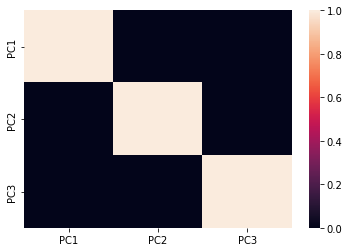

In [78]:

#Checking Co-relation between features after PCA
sns.heatmap(df_pca_3.corr())

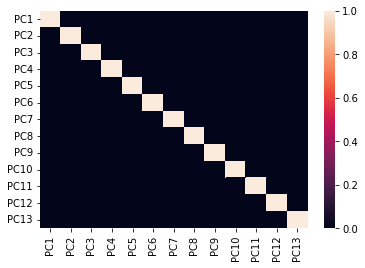

In [79]:
#Checking Co-relation between features after PCA
sns.heatmap(df_pca_85_var.corr())

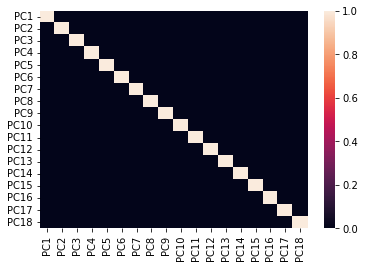

In [80]:
#Checking Co-relation between features after PCA
sns.heatmap(df_pca_95_var.corr())

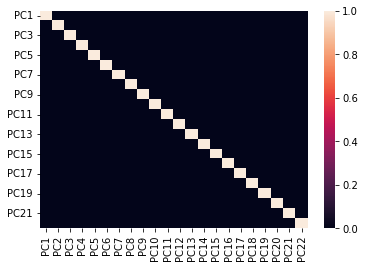

In [81]:
#Checking Co-relation between features after PCA
sns.heatmap(df_pca_99_var.corr())